# Nama : Aditya Dwi Suryo HardiYanto


# NIM : 22.11.5086


# Kelas : BDDM 4

**UAS BDDM**

# Prediksi Harga Saham Tesla Menggunakan Model XGBoost dengan Fitur Harga Penutupan yang Disesuaikan (Adj Close)

In [10]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [11]:
# Mount Google Drive (for loading dataset from Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load Dataset
file_path = '/content/drive/MyDrive/Semester 5/Basis Data & Data Mining/UAS/TeslaInc. ( TSLA ).csv'
data = pd.read_csv(file_path)

In [13]:
print(f"Total rows: {data.shape[0]}, Total columns: {data.shape[1]}")
print(data.head())
print(data.info())

Total rows: 3077, Total columns: 7
         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
mem

# DATA PREPROCESSING

# Tranformasi Data

In [14]:
print("Tipe data setiap kolom sebelum:")
print(data.dtypes)

Tipe data setiap kolom sebelum:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
print("Tipe data setiap kolom sesudah:")
print(data.dtypes)

Tipe data setiap kolom sesudah:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


# Pengecekan dan Pembersihan Data

In [17]:
# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
print(data.isnull().sum())


Jumlah nilai yang hilang per kolom:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

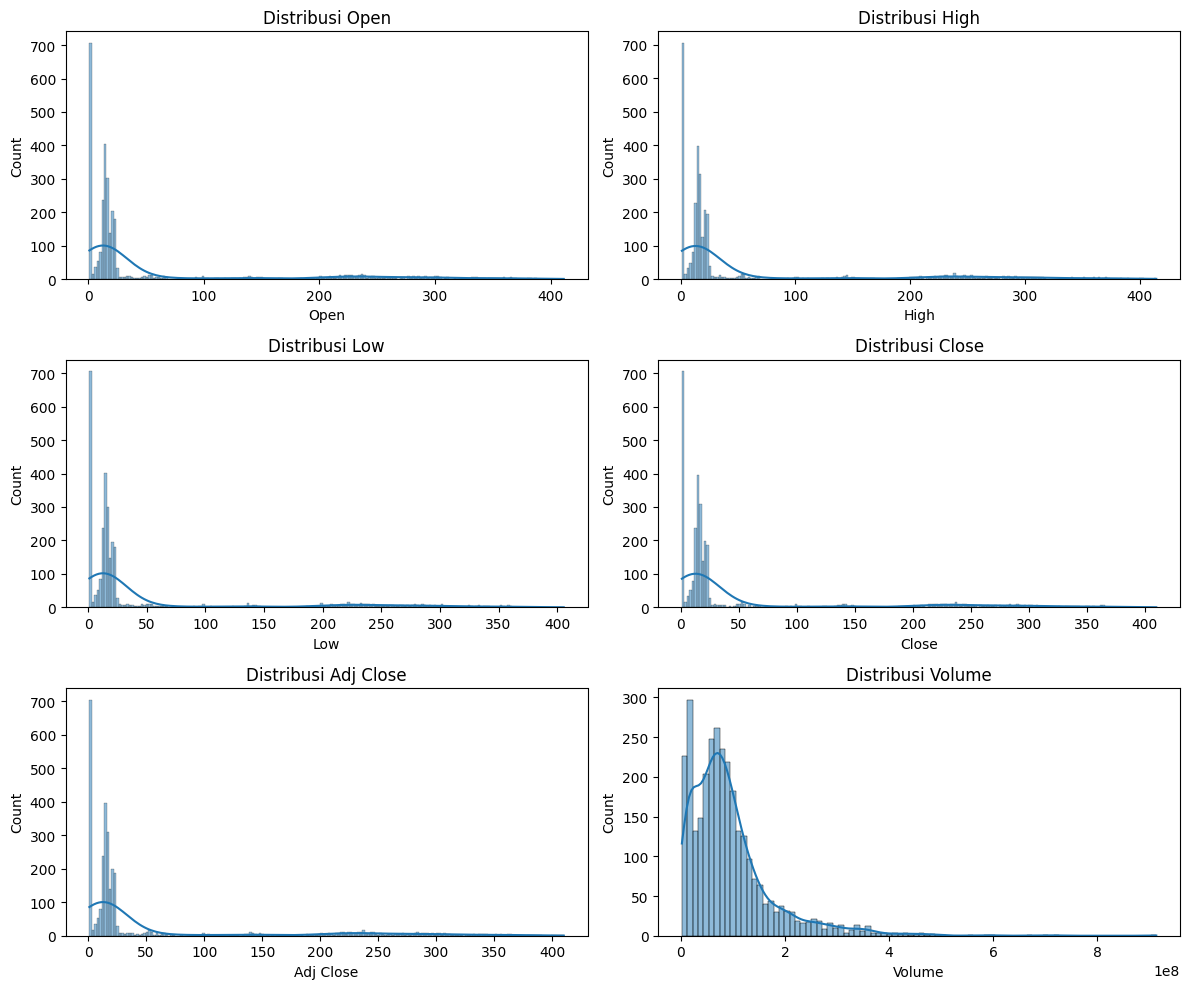

In [19]:
# Kolom yang akan dianalisis
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

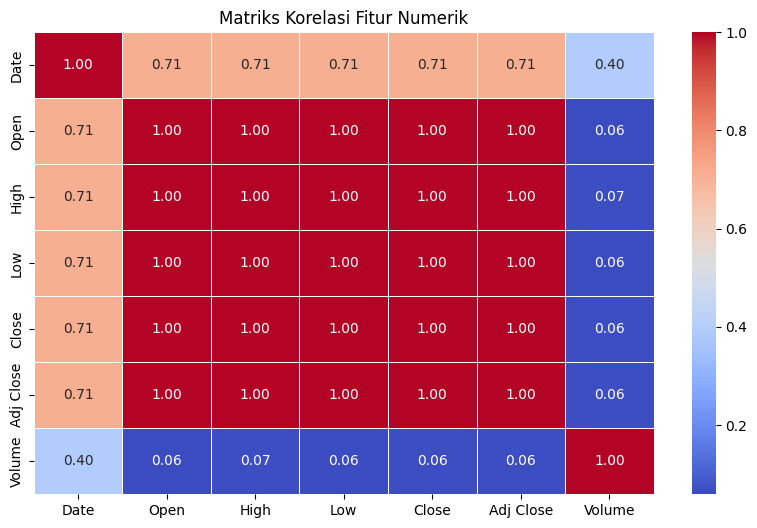

In [20]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

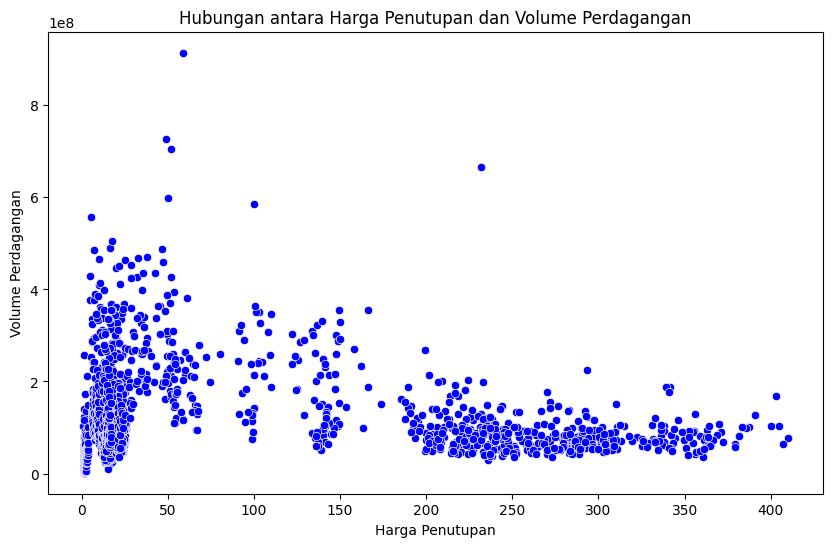

In [21]:
# Visualisasi Hubungan antara Volume dan Harga Penutupan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Close', y='Volume', color='blue')
plt.title('Hubungan antara Harga Penutupan dan Volume Perdagangan')
plt.xlabel('Harga Penutupan')
plt.ylabel('Volume Perdagangan')
plt.show()

# SELEKSI FITUR

In [22]:
# Memisahkan fitur dan target
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Fitur
y = data['Adj Close']  # Target: Adj Close

# Scaling/Normalisasi

In [23]:
# Normalisasi atau Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# MODELING

In [24]:
# Pembagian Data: 80% untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Inisialisasi Model XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [26]:
# melatih model XGBoost
# Mengonversi data ke format DMatrix yang digunakan oleh XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameter model XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression model
    'eval_metric': 'rmse',  # Root Mean Squared Error sebagai metrik evaluasi
}

# Melatih model
model = xgb.train(params, dtrain, num_boost_round=100)

In [27]:
# # Melatih model
# model.fit(X_train, y_train)

In [28]:
# Prediksi dengan model
y_pred = model.predict(dtest)

# Evaluasi Model

In [29]:
# Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [30]:
# Output Hasil Evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.4707689400281912
Root Mean Squared Error (RMSE): 1.2914355624980494
R-squared (R2): 0.9998066517437474


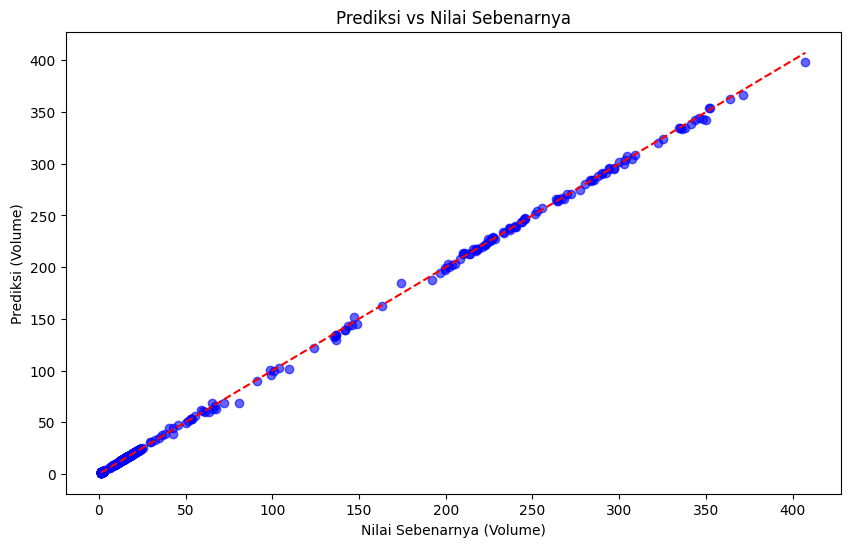

In [31]:
# Visualisasi Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Prediksi vs Nilai Sebenarnya")
plt.xlabel("Nilai Sebenarnya (Volume)")
plt.ylabel("Prediksi (Volume)")
plt.show()

In [32]:
# Menampilkan beberapa prediksi dan nilai aktual
predicted_vs_actual = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(predicted_vs_actual.head())

       Predicted      Actual
63      1.516377    1.465333
1918   20.971048   21.048668
2015   22.450209   22.337999
331     1.841629    1.822667
2737  193.952454  196.580002


# MENYIMPAN MODEL

In [34]:
import pickle

with open('tesla_stock_xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Memuat model
#     with open('xgboost_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
